In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [2]:
well_logs = '../data/Colorado_sonics_wells.csv'

In [3]:
df = pd.read_csv(well_logs, index_col=0)
df = df.dropna()

In [4]:
df.describe()

,Well_id,Depth,Caliper,Gamma,SelfPot,Resistivity,Neutron,Density,Sonic
count,453156.000000,453156.000000,453156.000000,453156.000000,453156.000000,453156.000000,453156.000000,453156.000000,453156.000000
mean,45.025790,1997.942079,8.198428,115.290287,-30.341652,8.737982,1.747447,2.553239,84.770135
std,27.119614,283.444228,0.558556,36.138214,181.403808,38.963128,7.103872,0.071992,11.177411
min,1.000000,1321.917600,4.500000,3.090000,-486.306900,0.133100,-1.027000,1.178000,-2.996000
25%,21.000000,1772.259600,7.851100,101.212300,-186.891150,2.675600,0.213800,2.517700,78.546675
50%,45.000000,1973.122800,8.015800,112.798100,2.775750,3.635050,0.265000,2.556900,86.574400
75%,67.000000,2189.226000,8.434800,126.613125,118.409500,6.236800,0.299600,2.587500,92.675225
max,96.000000,2782.671600,14.785900,2160.508497,662.844700,2000.000000,88.737900,3.033000,144.353400


<img src="../data/0512331305_36_sonics.png">

# Visual inspection of the data space

In [5]:
dimensions = ['Caliper', 'SelfPot', 'Gamma', 'Resistivity', 'Neutron', 'Density', 'Sonic']

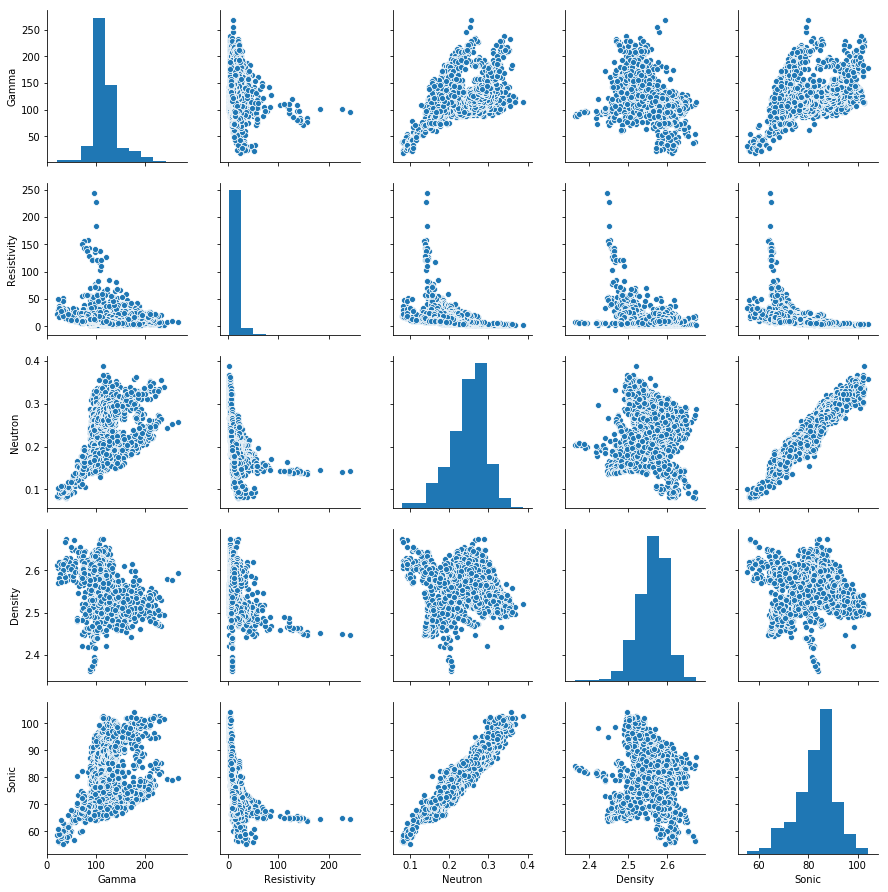

In [6]:
sns.pairplot(df[df.Well_id == 1.0], vars=dimensions[2:])

# Split the dataset

In [7]:
# How many wells are in the data set
df.Well_id.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 25., 26., 27.,
       28., 29., 30., 31., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75., 76., 79., 80., 81., 83., 84., 85., 86.,
       87., 88., 89., 90., 93., 94., 95., 96.])

 Let's start by training on the first five wells only


In [8]:
n = 5  # come back and change this number

In [9]:
df_train = df[df.Well_id <= n]
df_val = df[(df.Well_id > 30) & (df.Well_id <= 60)]
df_test = df[df.Well_id > 90]

In [10]:
X_train = df_train[['Gamma', 'Resistivity', 'Neutron', 'Density']].values
y_train = df_train['Sonic'].values

In [11]:
X_val = df_val[['Gamma', 'Resistivity', 'Neutron', 'Density']].values
y_val = df_val['Sonic'].values

X_test = df_test[['Gamma', 'Resistivity', 'Neutron', 'Density']].values
y_test = df_test['Sonic'].values

In [12]:
X_train.shape

(26294, 4)

In [13]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
df_val['Sonic_pred_LR'] = regr.predict(X_val)

/Users/Evan/miniconda3/envs/geocomp/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
df_val.head()

,Well_id,Depth,Caliper,Gamma,SelfPot,Resistivity,Neutron,Density,Sonic,Sonic_pred_LR
161775,31.0,1557.5280,8.2788,108.0262,-240.6302,2.6846,0.2707,2.5033,90.4563,83.878149
161776,31.0,1557.6804,8.2944,108.2410,-241.5853,2.8254,0.2591,2.4973,89.6526,84.076338
161777,31.0,1557.8328,8.2985,105.5440,-242.6420,3.0248,0.2436,2.4974,88.8897,83.740562
161778,31.0,1557.9852,8.2594,98.6939,-243.0718,3.3346,0.2402,2.5099,87.3548,82.499559
161779,31.0,1558.1376,8.2624,98.7893,-242.9345,3.6407,0.2465,2.5140,86.3463,82.260719


In [15]:
def plot_track(df, idx, true, pred):
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(2,12)
    true = df.loc[df.Well_id == idx, true]
    pred = df.loc[df.Well_id == idx, pred]
    depths = df.loc[df.Well_id == idx, 'Depth']
    ax.plot(true, depths, 'k', lw=1.5)
    ax.plot(pred, depths, 'r', lw=1.5)
    ax.set_ylim(2500, 1900)
    ax.set_xlim(40, 140)
    return

In [16]:
@interact(idx=(30.0, 60.0, 1.0))
def plot_different_wells(idx):
    plot_track(df_val, idx, 'Sonic', 'Sonic_pred_LR')
    return


interactive(children=(FloatSlider(value=45.0, description='idx', max=60.0, min=30.0, step=1.0), Output()), _do…

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,
                                 max_depth=5, random_state=0, loss='ls')

regr.fit(X_train, y_train)
df_val['Sonic_pred_GBR'] = regr.predict(X_val)

/Users/Evan/miniconda3/envs/geocomp/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [18]:
@interact(idx=(30.0, 60.0, 1.0))
def plot_different_wells(idx):
    plot_track(df_val, idx, 'Sonic', 'Sonic_pred_GBR')
    return

interactive(children=(FloatSlider(value=45.0, description='idx', max=60.0, min=30.0, step=1.0), Output()), _do…

 * Can We do better?
 * What other things can we try to improve the result? (More rows? More columns? What is this called?)
 * Which model is giving the best performance?
 * Can you optimize the model?


# Evaluation metrics

In [17]:
# To Do